In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

### CHosen dataset is no of Accidents in Factories of Punjab from 1968 to 2021
https://www.data.gov.in/catalog/accidents-factories-punjab

In [2]:
df=pd.read_csv("/kaggle/input/punjabfactoryaccidents/15_24AccidentsInFactories.csv")

### Step 1: cleaning and preprocessing

In [3]:
df

,Group Name,2021,2020,2019,2018,2017,2016,2015,2014,2013,...,1977,1976,1975,1974,1973,1972,1971,1970,1969,1968
0,Average no. of workers employed,783691,755919,746731,725507,683447,668366,652595,634243,618919,...,156817,144359,136280,131100,127451,118656,118503,116806,105924,104307
1,Fatal,26,20,64,16,20,23,21,16,29,...,16,34,25,18,23,22,26,20,25,16
2,Non-Fatal,23,40,83,84,117,115,100,98,103,...,3203,3379,2999,2688,2704,2611,2361,2442,2365,1914


In [5]:
df_indexed = df.set_index('Group Name')


df_transposed = df_indexed.transpose()

# Reset index to make 'Year' a column
df_transposed = df_transposed.reset_index()
df_transposed = df_transposed.rename(columns={'index': 'Year'})


In [6]:
df_transposed

Group Name,Year,Average no. of workers employed,Fatal,Non-Fatal
0,2021,783691,26,23
1,2020,755919,20,40
2,2019,746731,64,83
3,2018,725507,16,84
4,2017,683447,20,117
5,2016,668366,23,115
6,2015,652595,21,100
7,2014,634243,16,98
8,2013,618919,29,103
9,2012,614632,46,129


In [9]:
df_transposed = df_transposed.reset_index(drop=True)

In [14]:
df_transposed

Group Name,Year,Average no. of workers employed,Fatal,Non-Fatal
0,2021,783691,26,23
1,2020,755919,20,40
2,2019,746731,64,83
3,2018,725507,16,84
4,2017,683447,20,117
5,2016,668366,23,115
6,2015,652595,21,100
7,2014,634243,16,98
8,2013,618919,29,103
9,2012,614632,46,129


In [15]:
# Drop the 'Group Name' column (which is now an index column)
df_transposed = df_transposed.reset_index(drop=True)

# If the column is still present as a regular column, you can drop it this way
if 'Group Name' in df_transposed.columns:
    df_transposed = df_transposed.drop('Group Name', axis=1)

# Rename the columns for clarity if needed
df_transposed = df_transposed.rename(columns={
    'Average no. of workers employed': 'Workers_Employed',
    'Fatal': 'Fatal_Accidents',
    'Non-Fatal': 'Non_Fatal_Accidents'
})

# Make sure Year is an integer type
df_transposed['Year'] = df_transposed['Year'].astype(int)

# Display the clean dataframe
print(df_transposed.head())

Group Name  Year  Workers_Employed  Fatal_Accidents  Non_Fatal_Accidents
0           2021            783691               26                   23
1           2020            755919               20                   40
2           2019            746731               64                   83
3           2018            725507               16                   84
4           2017            683447               20                  117


In [16]:
df_transposed

Group Name,Year,Workers_Employed,Fatal_Accidents,Non_Fatal_Accidents
0,2021,783691,26,23
1,2020,755919,20,40
2,2019,746731,64,83
3,2018,725507,16,84
4,2017,683447,20,117
5,2016,668366,23,115
6,2015,652595,21,100
7,2014,634243,16,98
8,2013,618919,29,103
9,2012,614632,46,129


In [18]:
df=df_transposed

In [19]:
df

Group Name,Year,Workers_Employed,Fatal_Accidents,Non_Fatal_Accidents
0,2021,783691,26,23
1,2020,755919,20,40
2,2019,746731,64,83
3,2018,725507,16,84
4,2017,683447,20,117
5,2016,668366,23,115
6,2015,652595,21,100
7,2014,634243,16,98
8,2013,618919,29,103
9,2012,614632,46,129


In [20]:
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

# Check percentage of missing values
print("\nPercentage of missing values:")
print((df.isnull().sum() / len(df) * 100).round(2))

# Verify data types
print("\nData types of each column:")
print(df.dtypes)

# Check for any unexpected values
print("\nSummary statistics to spot any outliers or unexpected values:")
print(df.describe())

# Check for any duplicate rows
print("\nNumber of duplicate rows:")
print(df.duplicated().sum())

Missing values in each column:
Group Name
Year                   0
Workers_Employed       0
Fatal_Accidents        0
Non_Fatal_Accidents    0
dtype: int64

Percentage of missing values:
Group Name
Year                   0.0
Workers_Employed       0.0
Fatal_Accidents        0.0
Non_Fatal_Accidents    0.0
dtype: float64

Data types of each column:
Group Name
Year                   int64
Workers_Employed       int64
Fatal_Accidents        int64
Non_Fatal_Accidents    int64
dtype: object

Summary statistics to spot any outliers or unexpected values:
Group Name         Year  Workers_Employed  Fatal_Accidents  \
count         54.000000         54.000000        54.000000   
mean        1994.500000     402948.740741        30.203704   
std           15.732133     200831.926219        10.002603   
min         1968.000000     104307.000000        16.000000   
25%         1981.250000     216346.750000        23.000000   
50%         1994.500000     429368.500000        28.500000   
75%         20

### EDA

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = df.reset_index(drop=True)

# Calculate additional metrics for analysis
df['Total_Accidents'] = df['Fatal_Accidents'] + df['Non_Fatal_Accidents']
df['Fatal_Rate_per_100k'] = (df['Fatal_Accidents'] / df['Workers_Employed']) * 100000
df['Non_Fatal_Rate_per_100k'] = (df['Non_Fatal_Accidents'] / df['Workers_Employed']) * 100000
df['Total_Accident_Rate_per_100k'] = (df['Total_Accidents'] / df['Workers_Employed']) * 100000

# Basic descriptive statistics
print("Descriptive Statistics:")
print(df.describe())




Descriptive Statistics:
Group Name         Year  Workers_Employed  Fatal_Accidents  \
count         54.000000         54.000000        54.000000   
mean        1994.500000     402948.740741        30.203704   
std           15.732133     200831.926219        10.002603   
min         1968.000000     104307.000000        16.000000   
25%         1981.250000     216346.750000        23.000000   
50%         1994.500000     429368.500000        28.500000   
75%         2007.750000     574687.750000        35.000000   
max         2021.000000     783691.000000        64.000000   

Group Name  Non_Fatal_Accidents  Total_Accidents  Fatal_Rate_per_100k  \
count                 54.000000        54.000000            54.000000   
mean                1420.222222      1450.425926             9.886594   
std                 1288.635459      1286.692859             5.758888   
min                   23.000000        49.000000             2.205354   
25%                  155.250000       201.000000    

#### Workers employed over time

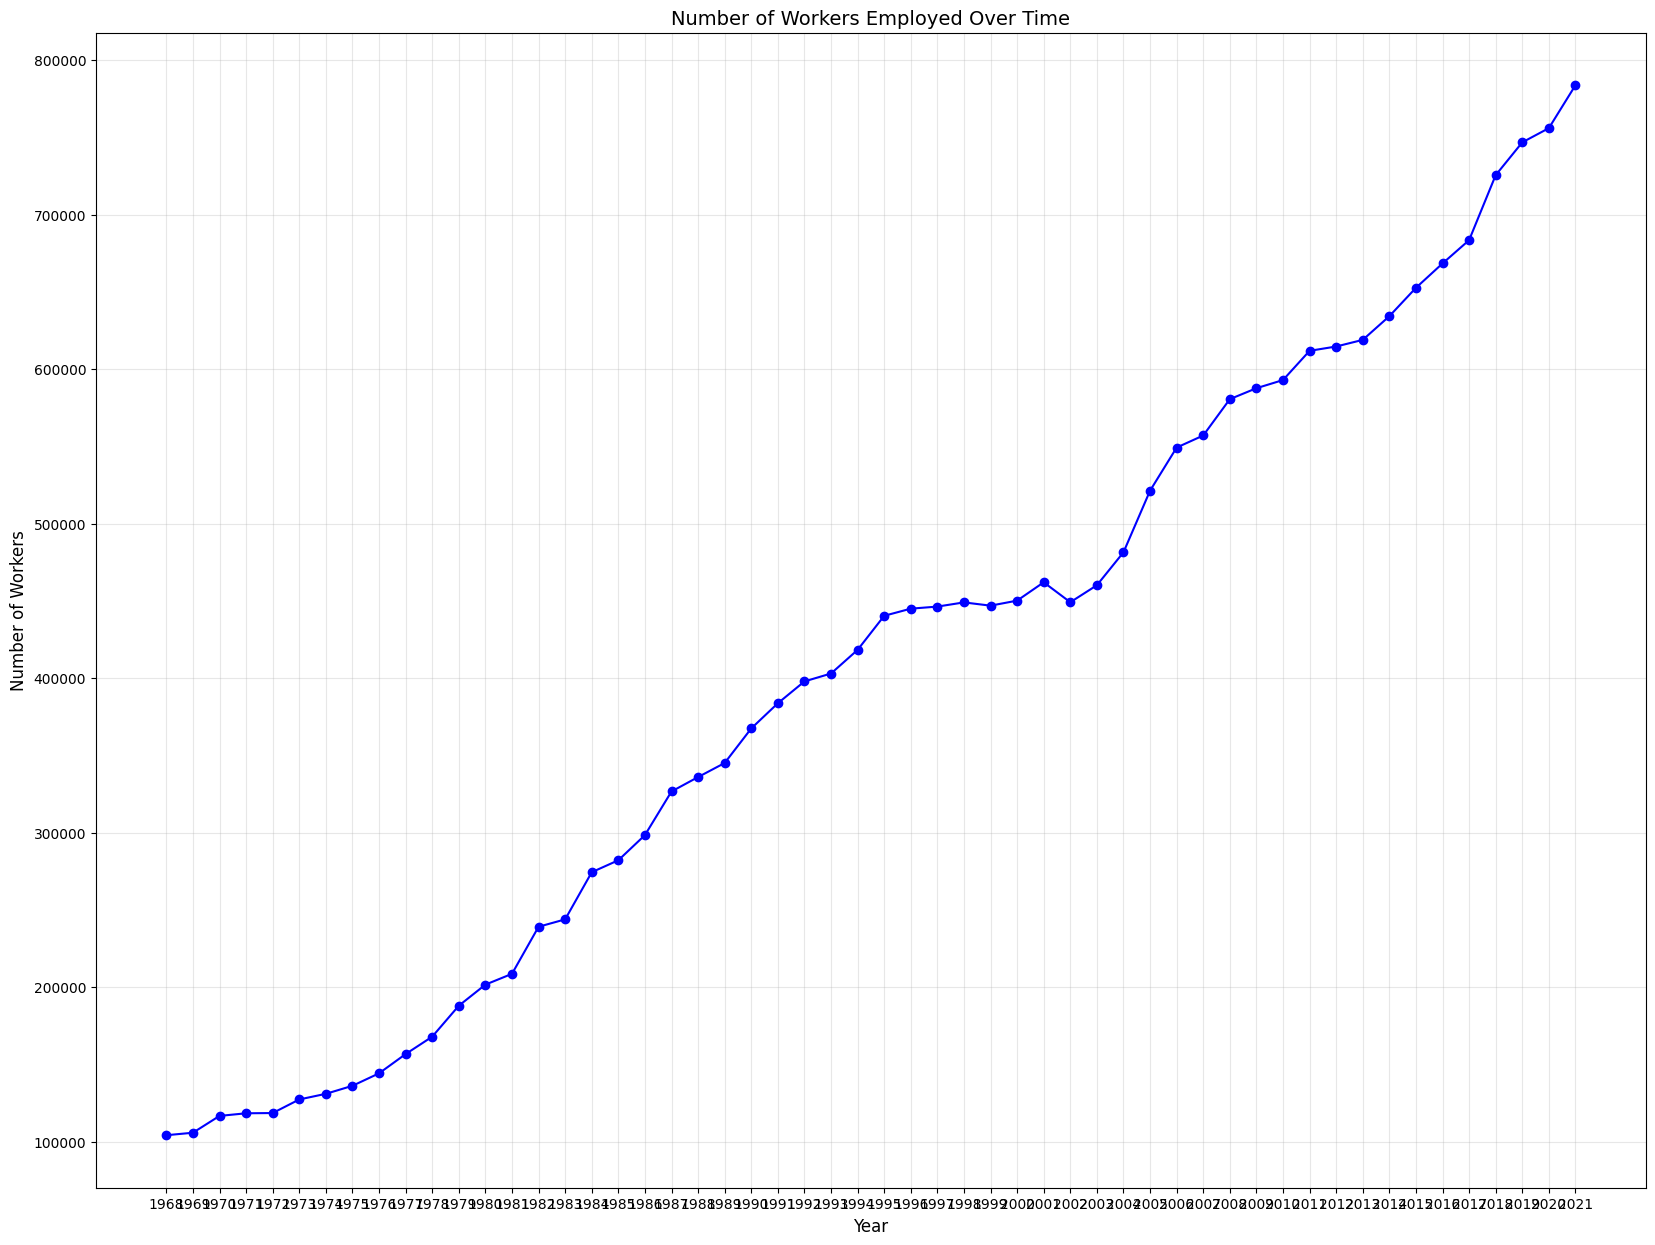

In [24]:
plt.figure(figsize=(20, 15))

# 1. Workers employed over time

plt.plot(df['Year'], df['Workers_Employed'], marker='o', linestyle='-', color='blue')
plt.title('Number of Workers Employed Over Time', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Workers', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(df['Year'])
plt.show()


#### 2. Absolute number of non fatal accidents over time

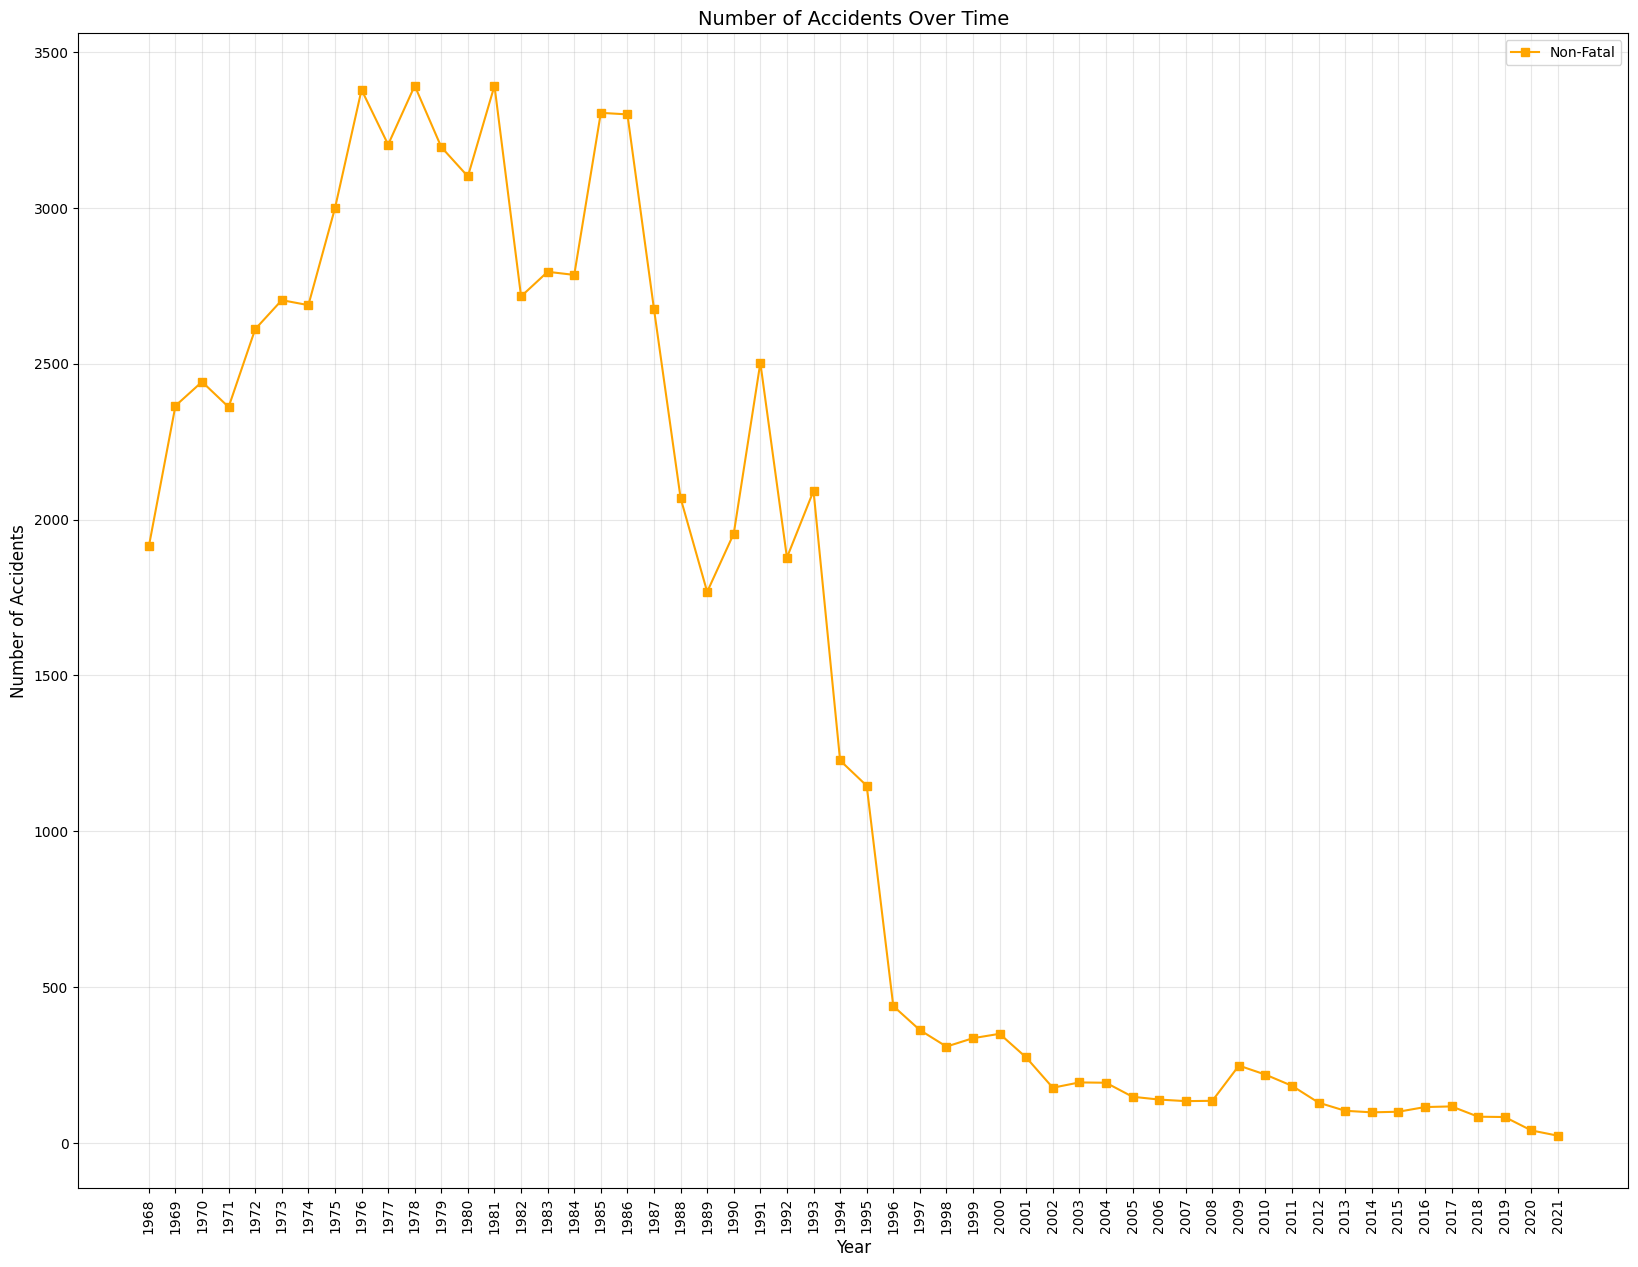

In [31]:
plt.figure(figsize=(20, 15))
plt.plot(df['Year'], df['Non_Fatal_Accidents'], marker='s', linestyle='-', color='orange', label='Non-Fatal')
plt.title('Number of Accidents Over Time', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(df['Year'],rotation=90)
plt.show()

#### 3. Absolute number of fatal accidents over time

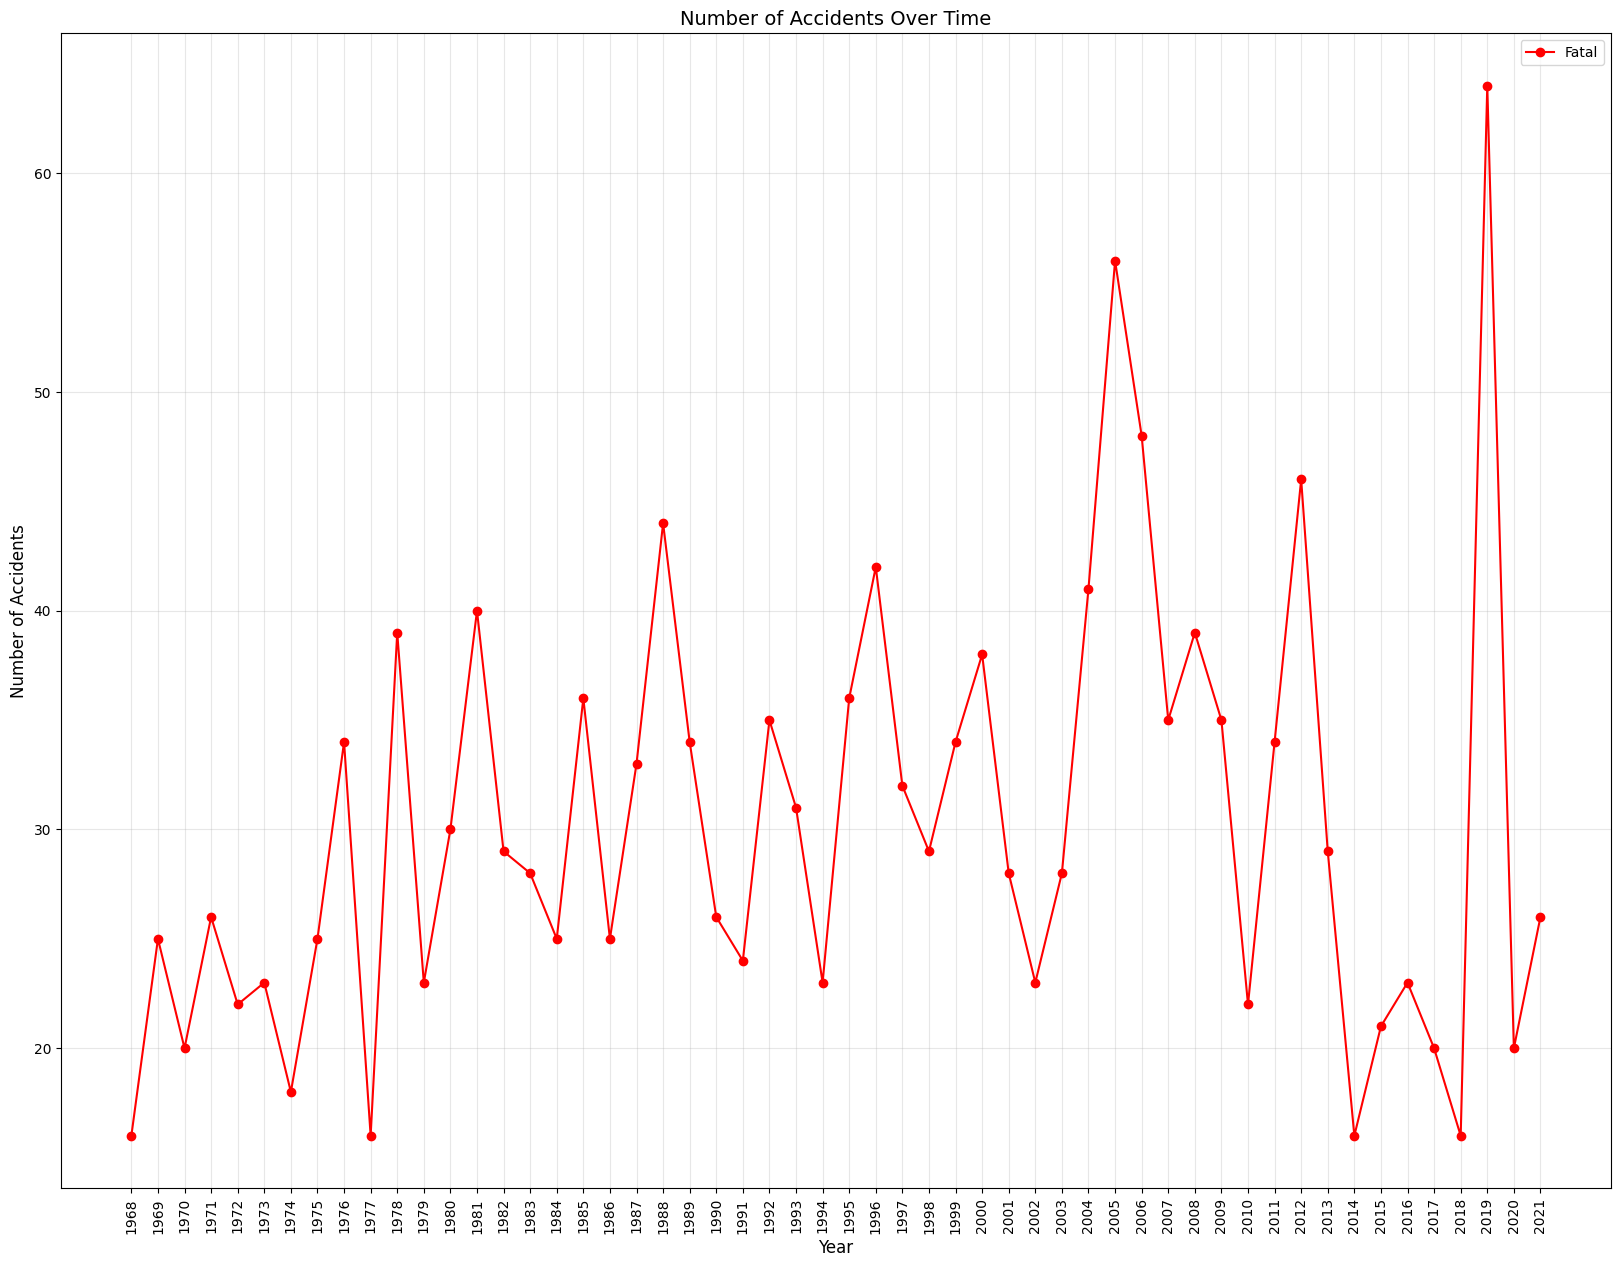

In [32]:
plt.figure(figsize=(20, 15))
plt.plot(df['Year'], df['Fatal_Accidents'], marker='o', linestyle='-', color='red', label='Fatal')
#plt.plot(df['Year'], df['Non_Fatal_Accidents'], marker='s', linestyle='-', color='orange', label='Non-Fatal')
plt.title('Number of Accidents Over Time', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(df['Year'], rotation=90)
#ax.set_xticklabels(ax.get_xticks(), rotation = 90)
 
plt.show()

####  4.  Fatal Accident rates per 100,000 workers

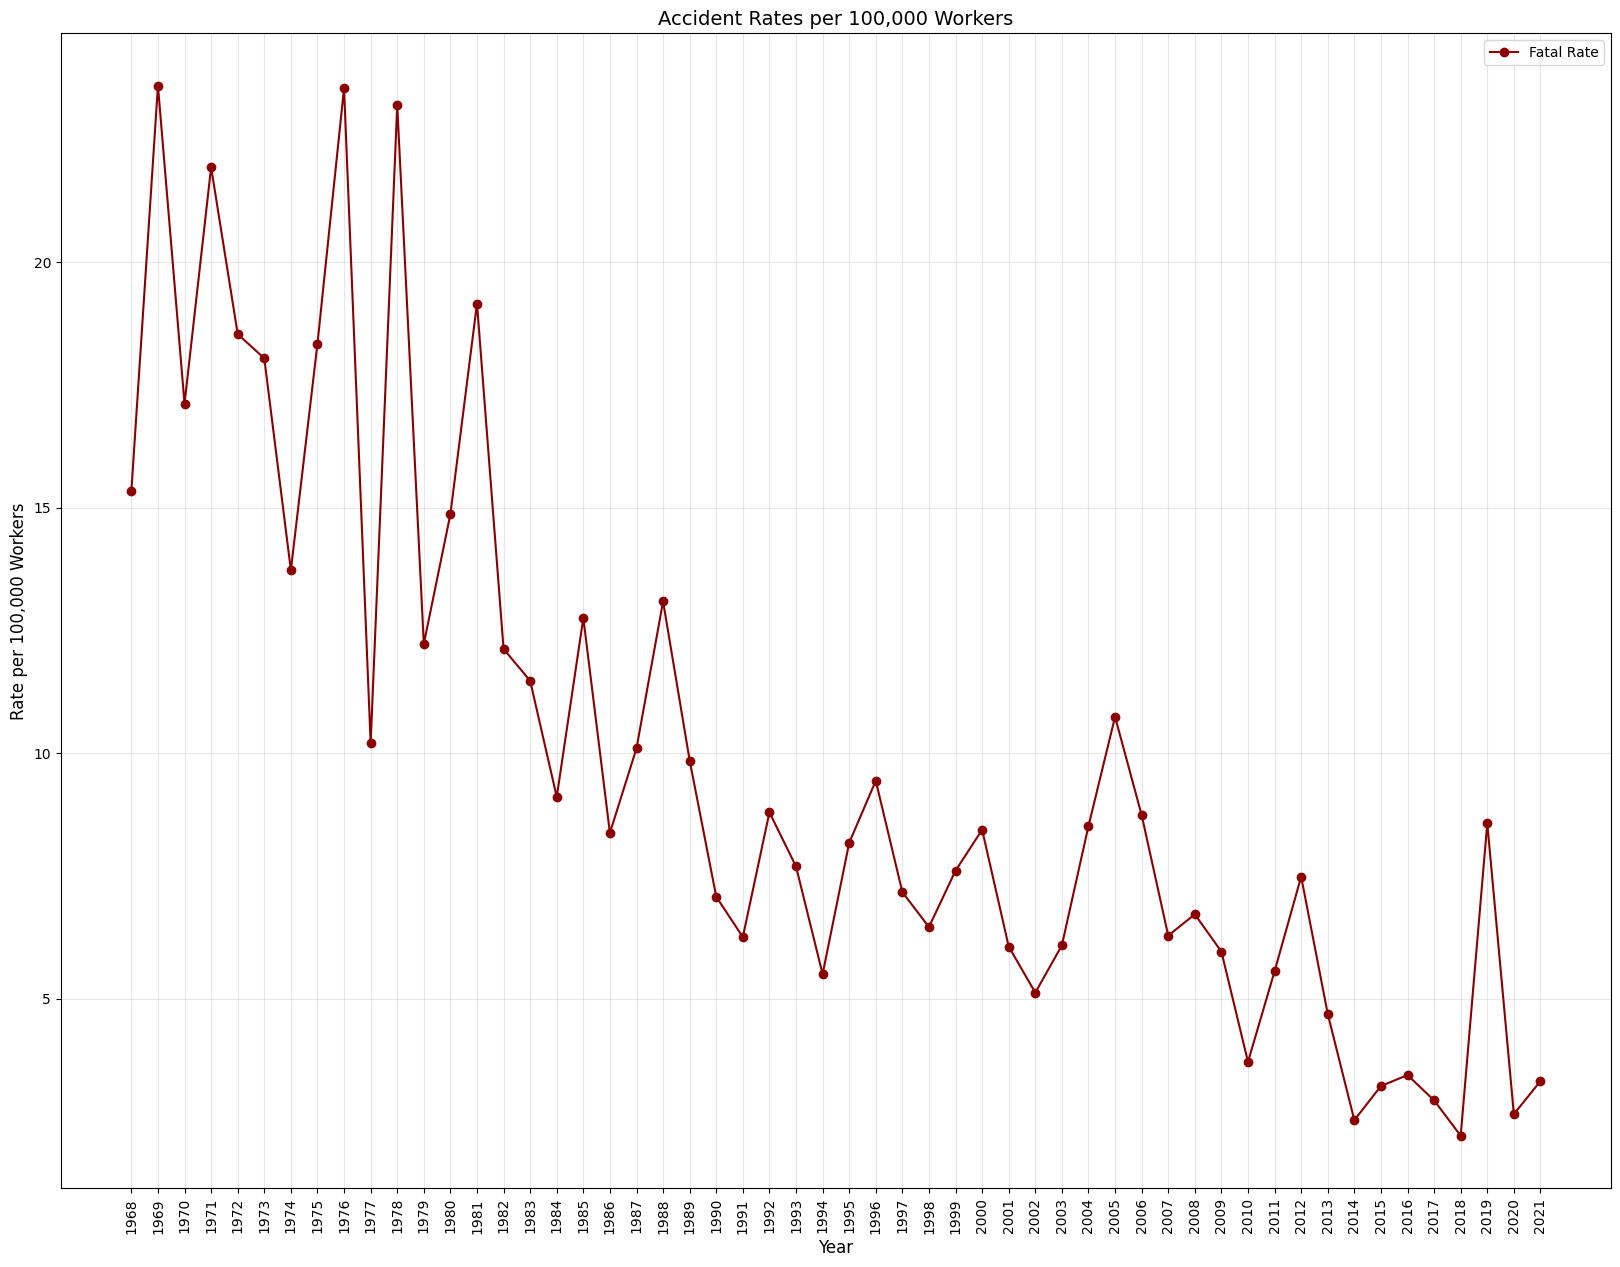

In [35]:
plt.figure(figsize=(20, 15))

plt.plot(df['Year'], df['Fatal_Rate_per_100k'], marker='o', linestyle='-', color='darkred', label='Fatal Rate')
#plt.plot(df['Year'], df['Non_Fatal_Rate_per_100k'], marker='s', linestyle='-', color='darkorange', label='Non-Fatal Rate')
plt.title('Accident Rates per 100,000 Workers', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Rate per 100,000 Workers', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(df['Year'],rotation=90)
plt.show()

####  5 Non Fatal Accident rates per 100,000 workers

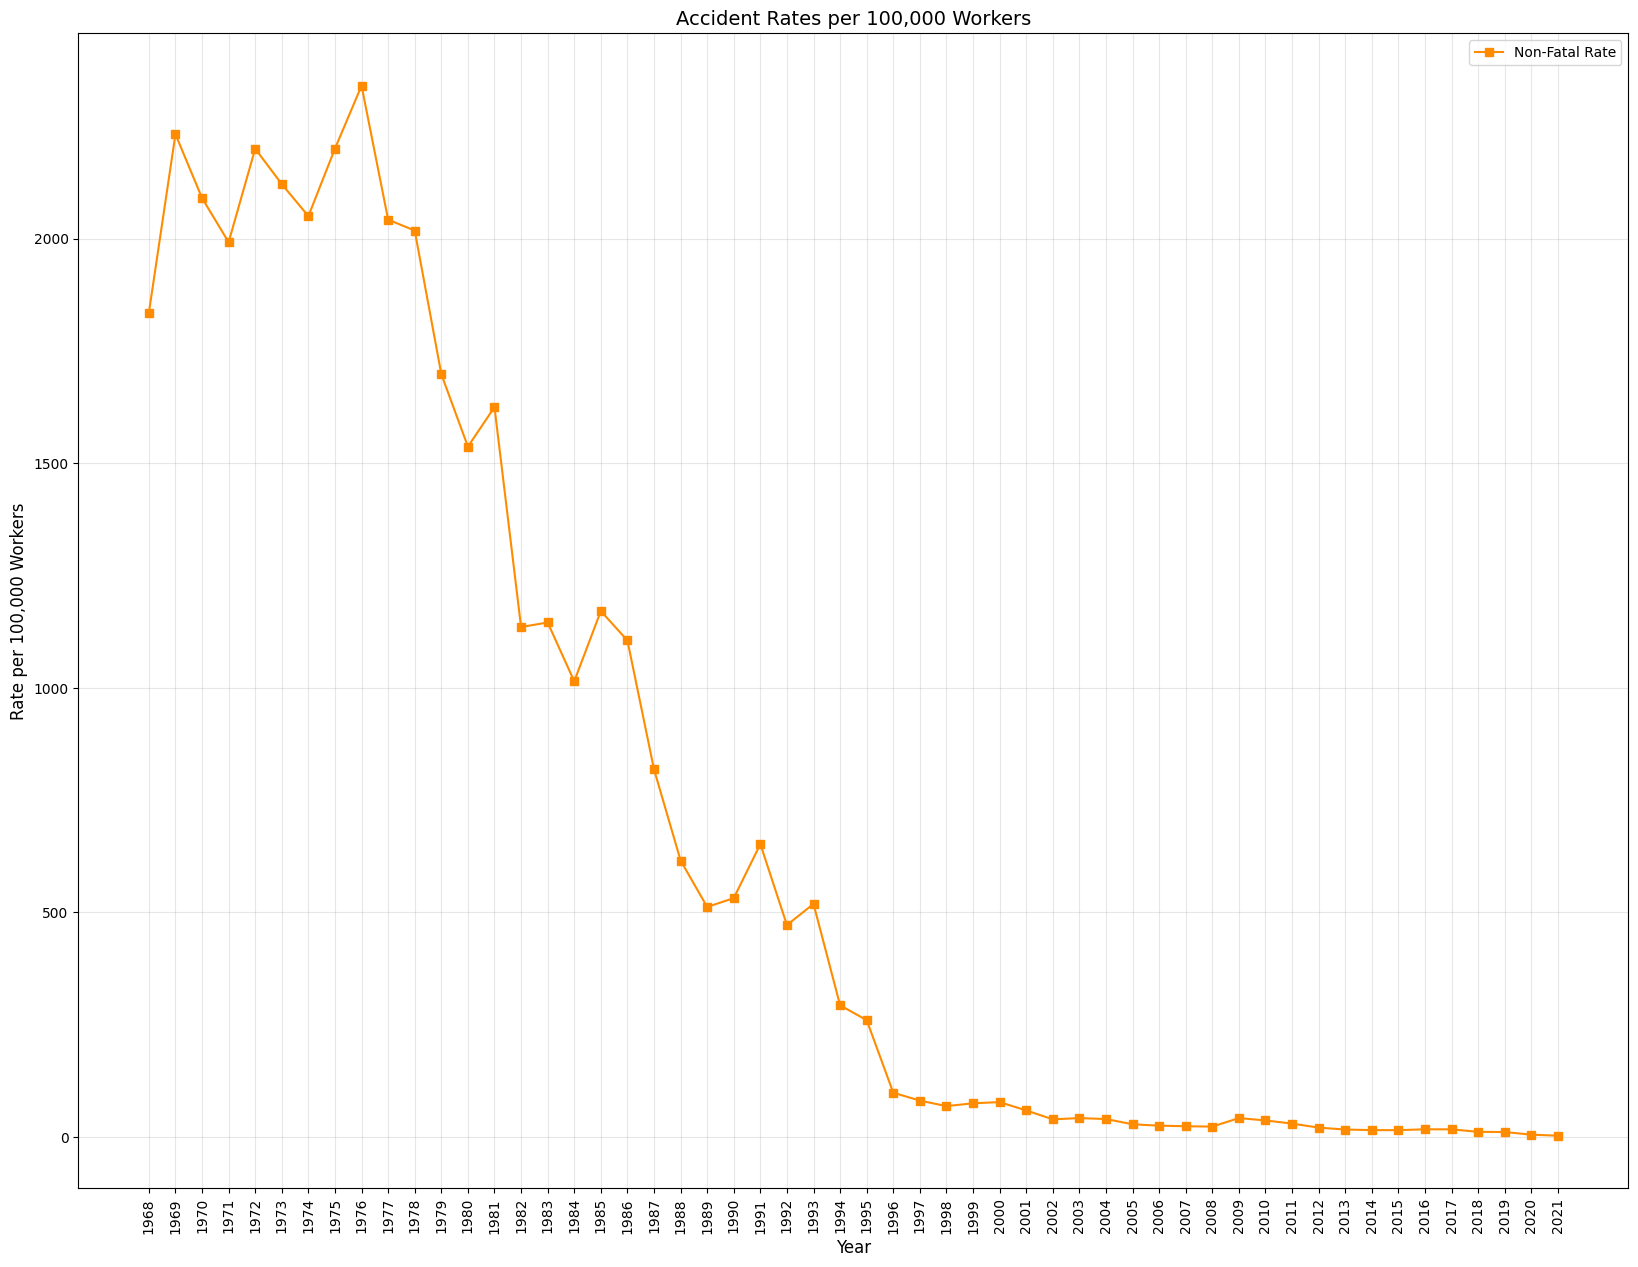

In [36]:
plt.figure(figsize=(20, 15))

#plt.plot(df['Year'], df['Fatal_Rate_per_100k'], marker='o', linestyle='-', color='darkred', label='Fatal Rate')
plt.plot(df['Year'], df['Non_Fatal_Rate_per_100k'], marker='s', linestyle='-', color='darkorange', label='Non-Fatal Rate')
plt.title('Accident Rates per 100,000 Workers', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Rate per 100,000 Workers', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(df['Year'],rotation=90)
plt.show()

#### total accidents vs workforce size

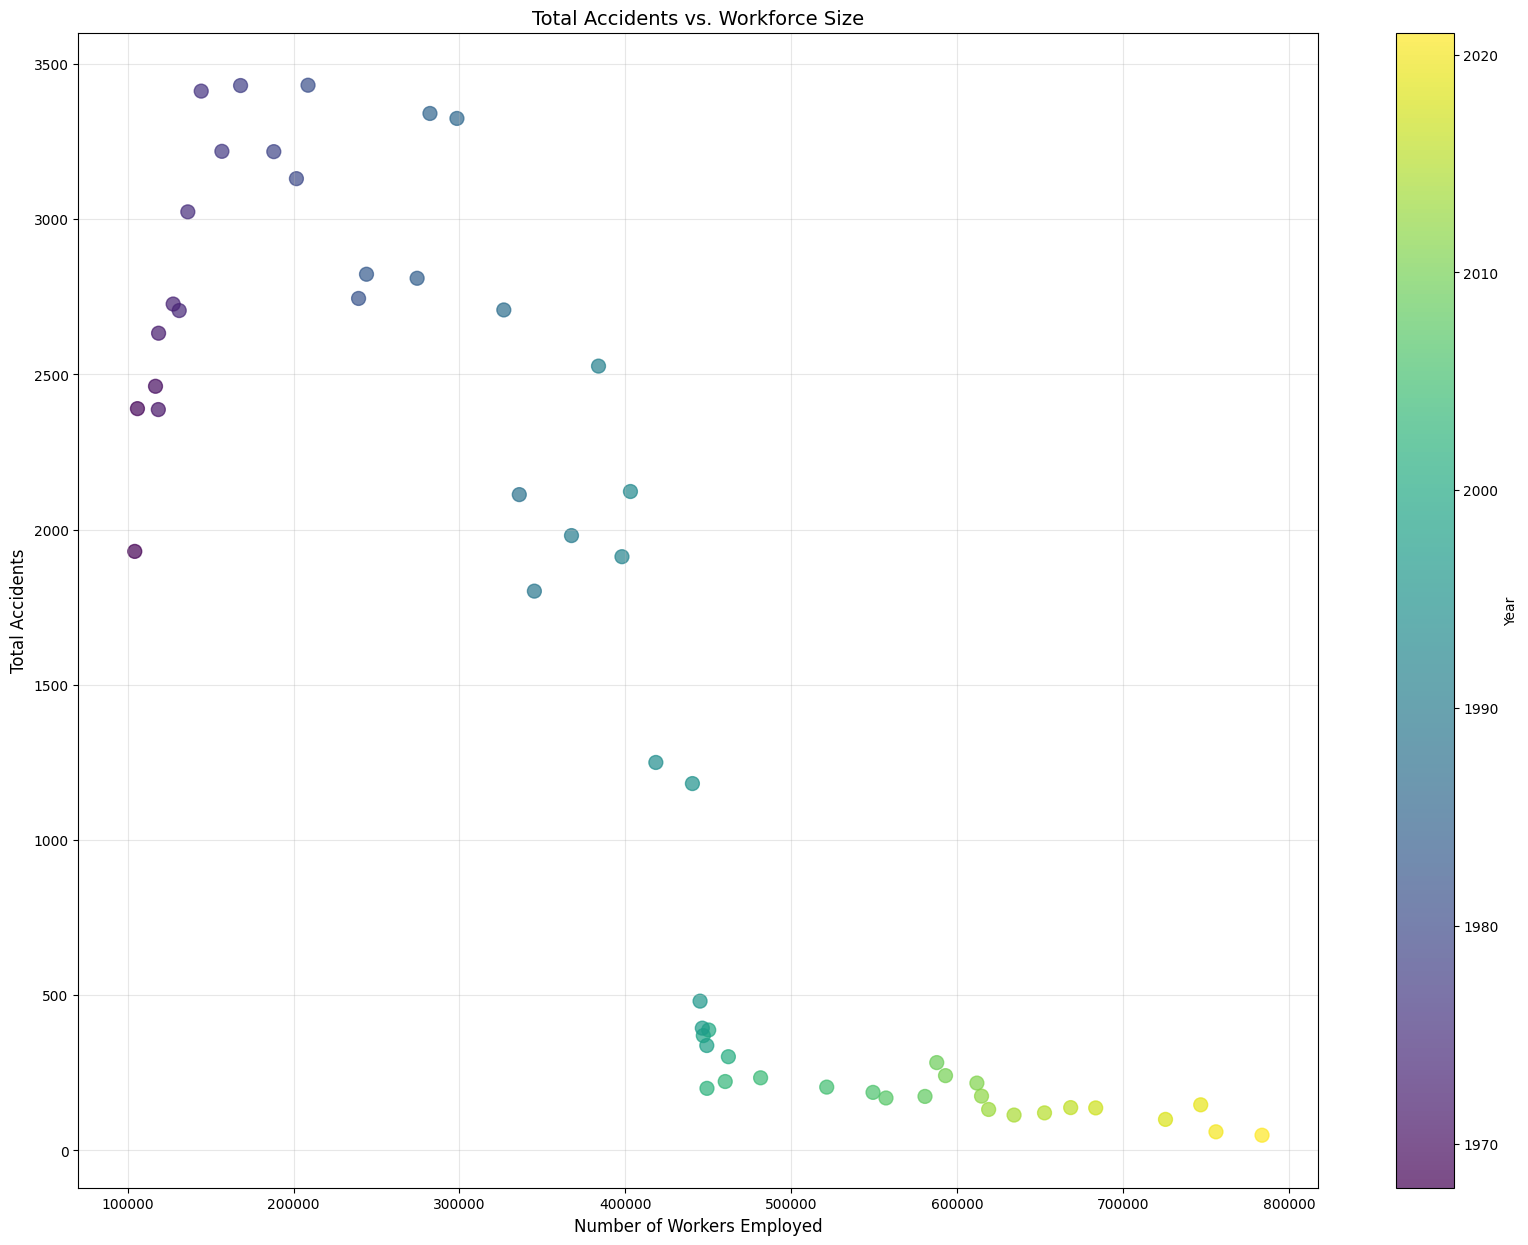

In [37]:
plt.figure(figsize=(20, 15))
plt.scatter(df['Workers_Employed'], df['Total_Accidents'], s=100, alpha=0.7, c=df['Year'], cmap='viridis')
plt.colorbar(label='Year')
plt.title('Total Accidents vs. Workforce Size', fontsize=14)
plt.xlabel('Number of Workers Employed', fontsize=12)
plt.ylabel('Total Accidents', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

#### Fatal vs Non Fatal accidents

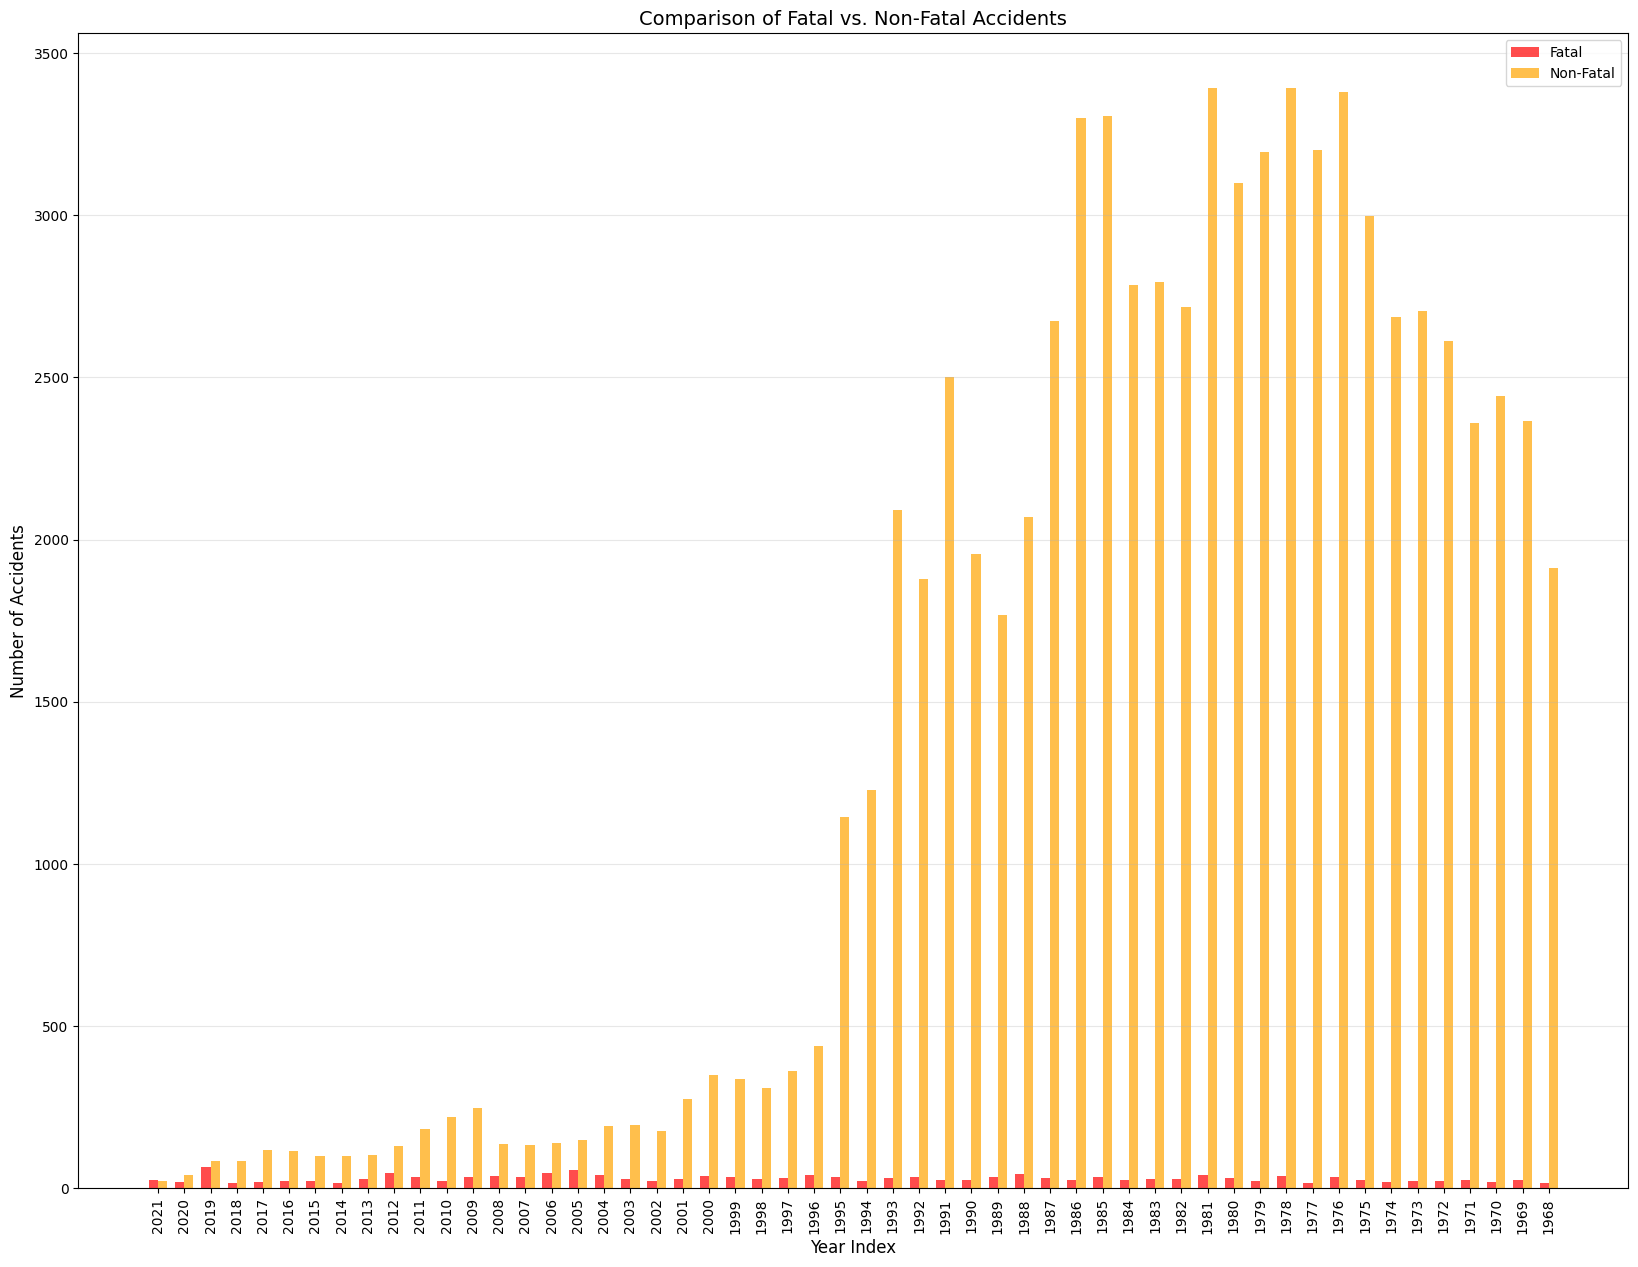

In [39]:
plt.figure(figsize=(20, 15))
bar_width = 0.35
indices = np.arange(len(df))
plt.bar(indices, df['Fatal_Accidents'], bar_width, label='Fatal', color='red', alpha=0.7)
plt.bar(indices + bar_width, df['Non_Fatal_Accidents'], bar_width, label='Non-Fatal', color='orange', alpha=0.7)
plt.title('Comparison of Fatal vs. Non-Fatal Accidents', fontsize=14)
plt.xlabel('Year Index', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.xticks(indices + bar_width/2, df['Year'],rotation=90)
plt.legend()
plt.grid(True, alpha=0.3, axis='y')
plt.show()

#### Stats of most recent year

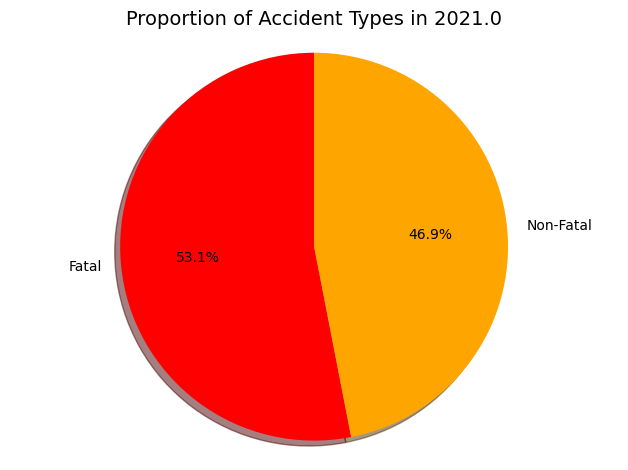

In [41]:

latest_year = df.iloc[0]['Year']  # Assuming the first row is the latest year
latest_data = df.iloc[0]
labels = ['Fatal', 'Non-Fatal']
sizes = [latest_data['Fatal_Accidents'], latest_data['Non_Fatal_Accidents']]
colors = ['red', 'orange']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, shadow=True)
plt.axis('equal')
plt.title(f'Proportion of Accident Types in {latest_year}', fontsize=14)

plt.tight_layout()
plt.savefig('accidents_eda.png', dpi=300, bbox_inches='tight')
plt.show()

#### correlation heatmap

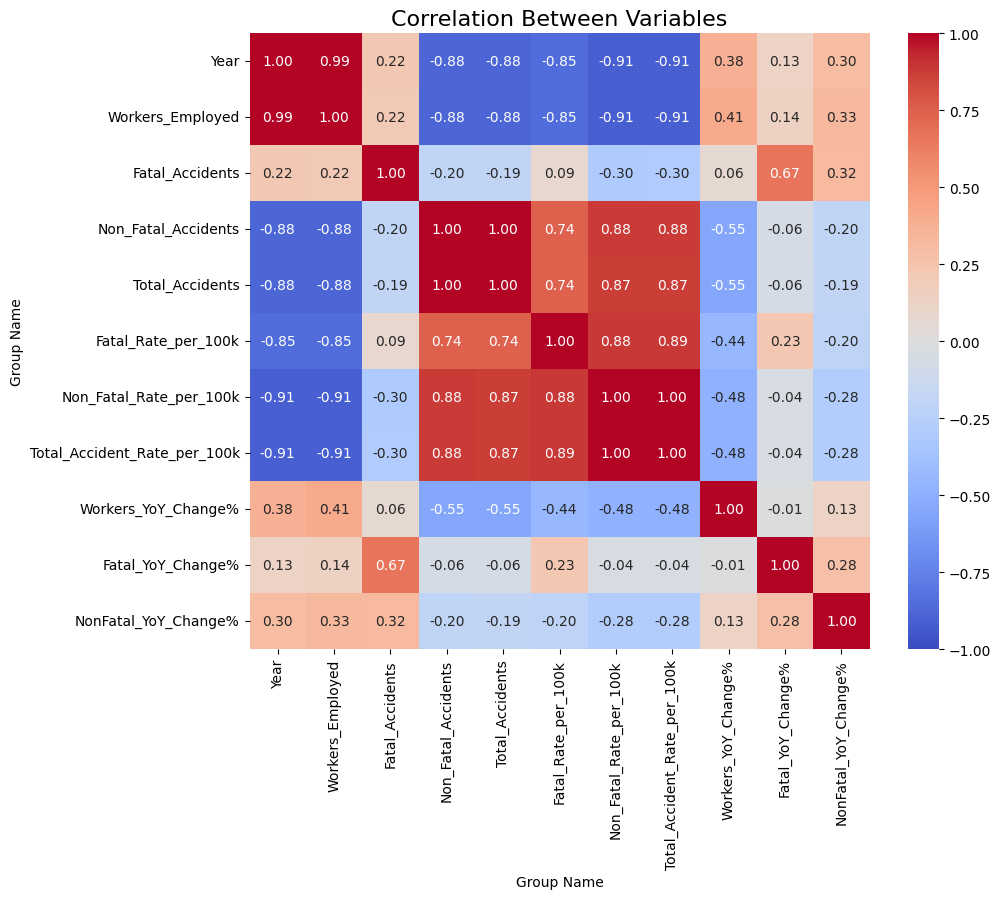

In [42]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
plt.title('Correlation Between Variables', fontsize=16)
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()



In [43]:
# Additional analysis: Year-to-year percentage changes
df['Workers_YoY_Change%'] = df['Workers_Employed'].pct_change() * 100
df['Fatal_YoY_Change%'] = df['Fatal_Accidents'].pct_change() * 100
df['NonFatal_YoY_Change%'] = df['Non_Fatal_Accidents'].pct_change() * 100

print("\nYear-to-Year Changes:")
print(df[['Year', 'Workers_YoY_Change%', 'Fatal_YoY_Change%', 'NonFatal_YoY_Change%']].head())


Year-to-Year Changes:
Group Name  Year  Workers_YoY_Change%  Fatal_YoY_Change%  NonFatal_YoY_Change%
0           2021                  NaN                NaN                   NaN
1           2020            -3.543744         -23.076923             73.913043
2           2019            -1.215474         220.000000            107.500000
3           2018            -2.842255         -75.000000              1.204819
4           2017            -5.797325          25.000000             39.285714


/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [44]:
# Calculate summary statistics
print("\nKey Insights:")
print("-" * 50)
print(f"Average annual workforce: {df['Workers_Employed'].mean():.0f} workers")
print(f"Average annual fatal accidents: {df['Fatal_Accidents'].mean():.1f}")
print(f"Average annual non-fatal accidents: {df['Non_Fatal_Accidents'].mean():.1f}")
print(f"Average fatal accident rate per 100k workers: {df['Fatal_Rate_per_100k'].mean():.2f}")
print(f"Average non-fatal accident rate per 100k workers: {df['Non_Fatal_Rate_per_100k'].mean():.2f}")

# Identify trends
print("\nKey Trends:")
print("-" * 50)

# Workforce trend
worker_trend = np.polyfit(range(len(df)), df['Workers_Employed'], 1)[0]
trend_direction = "increasing" if worker_trend > 0 else "decreasing"
print(f"Workforce trend: {trend_direction} at an average rate of {abs(worker_trend):.0f} workers per year")

# Fatal accident trend
fatal_trend = np.polyfit(range(len(df)), df['Fatal_Rate_per_100k'], 1)[0]
trend_direction = "increasing" if fatal_trend > 0 else "decreasing"
print(f"Fatal accident rate trend: {trend_direction} at an average rate of {abs(fatal_trend):.4f} per 100k workers per year")

# Non-fatal accident trend
nonfatal_trend = np.polyfit(range(len(df)), df['Non_Fatal_Rate_per_100k'], 1)[0]
trend_direction = "increasing" if nonfatal_trend > 0 else "decreasing"
print(f"Non-fatal accident rate trend: {trend_direction} at an average rate of {abs(nonfatal_trend):.4f} per 100k workers per year")

# Year with highest/lowest metrics
print("\nNotable Years:")
print("-" * 50)
print(f"Year with highest fatal accidents: {df.loc[df['Fatal_Accidents'].idxmax()]['Year']} ({df['Fatal_Accidents'].max()} accidents)")
print(f"Year with highest non-fatal accidents: {df.loc[df['Non_Fatal_Accidents'].idxmax()]['Year']} ({df['Non_Fatal_Accidents'].max()} accidents)")
print(f"Year with highest fatal accident rate: {df.loc[df['Fatal_Rate_per_100k'].idxmax()]['Year']} ({df['Fatal_Rate_per_100k'].max():.2f} per 100k)")
print(f"Year with highest non-fatal accident rate: {df.loc[df['Non_Fatal_Rate_per_100k'].idxmax()]['Year']} ({df['Non_Fatal_Rate_per_100k'].max():.2f} per 100k)")


Key Insights:
--------------------------------------------------
Average annual workforce: 402949 workers
Average annual fatal accidents: 30.2
Average annual non-fatal accidents: 1420.2
Average fatal accident rate per 100k workers: 9.89
Average non-fatal accident rate per 100k workers: 725.18

Key Trends:
--------------------------------------------------
Workforce trend: decreasing at an average rate of 12690 workers per year
Fatal accident rate trend: increasing at an average rate of 0.3101 per 100k workers per year
Non-fatal accident rate trend: increasing at an average rate of 48.5053 per 100k workers per year

Notable Years:
--------------------------------------------------
Year with highest fatal accidents: 2019.0 (64 accidents)
Year with highest non-fatal accidents: 1981.0 (3392 accidents)
Year with highest fatal accident rate: 1969.0 (23.60 per 100k)
Year with highest non-fatal accident rate: 1976.0 (2340.69 per 100k)


### Insights



1. **Dramatic Decline in Non-Fatal Accidents**: Despite a massive increase in workforce (from 104,307 workers in 1968 to 783,691 in 2021), non-fatal accidents have plummeted from thousands per year in the 1970s-1990s to just 23 in 2021 - a remarkable safety improvement.

2. **Fatal Accidents Show Less Improvement**: While non-fatal accidents decreased dramatically, fatal accidents remained relatively stable, ranging between 16-64 per year across the entire period, without showing the same dramatic decline.

3. **1980s-1990s Peak in Non-Fatal Accidents**: The years 1985-1995 show exceptionally high non-fatal accident counts (often over 3,000 per year), possibly indicating different reporting standards or major regulatory/safety challenges during this period.

4. **Sharp Safety Transition Around 2000**: There appears to be a significant transition point around 2000, after which non-fatal accidents began declining consistently, suggesting major safety reforms or reporting changes.

5. **2019 Fatal Accident Spike**: 2019 shows a concerning spike in fatal accidents (64), which is significantly higher than surrounding years and represents the highest count in the entire dataset.

6. **Workforce Growth Acceleration**: The workforce has grown approximately 650% since 1968, but growth accelerated particularly after 2000, while accident rates declined - indicating successful scaling of safety measures.

7. **Possible Covid Impact**: The sharp decrease in non-fatal accidents in 2020-2021 (40 and 23) might reflect reduced factory operations during the COVID-19 pandemic, while fatal accidents remained relatively stable.

8. **Non-Fatal to Fatal Ratio Change**: In the 1970s-1990s, there were often over 100 non-fatal accidents for every fatal accident. By 2021, this ratio dropped to less than 1:1, suggesting either significant improvements in preventing minor accidents or changes in reporting criteria.

9. **Consistent Fatal Accident Rate Improvement**: When normalized per 100,000 workers, the fatal accident rate has steadily improved from approximately 15-20 per 100,000 workers in the early years to about 3-4 per 100,000 in recent years.

10. **Potential Reporting Changes**: The extremely sharp drops in non-fatal accidents (e.g., from 1,146 in 1995 to 439 in 1996) suggest possible changes in accident classification or reporting requirements rather than purely safety improvements.

These observations reveal an improved factory safety in Punjab over five decades, with non-fatal accidents showing far more improvement than fatal ones, and with several transition points suggesting regulatory or reporting changes alongside genuine safety improvements.